In [13]:
import matplotlib.pyplot as plt
import numpy as np
from src.utils import read_pgm, plot_side_by_side
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\users\rameg\miniconda2\envs\patternrec\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


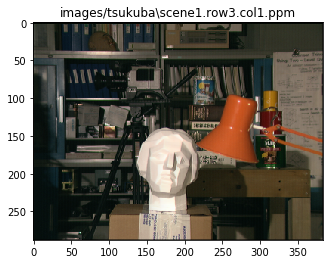

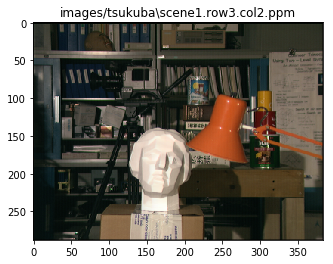

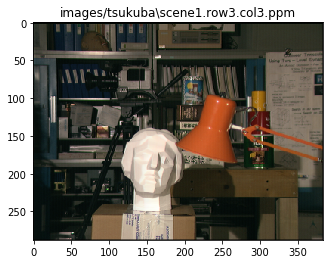

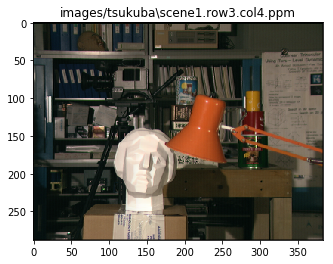

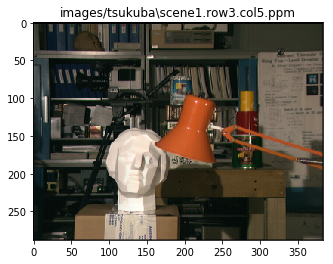

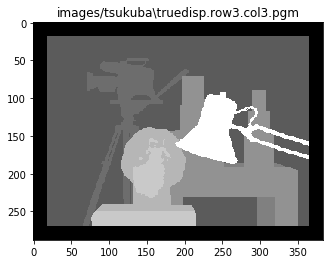

In [19]:
from glob import glob
from scipy.misc import imread
boat_ims = []
for im_path in glob('images/tsukuba/*.*'):
    plt.figure()
    boat_ims.append(imread(im_path))
    plt.imshow(boat_ims[-1], cmap='gray')
    plt.title(im_path)

(489, 627, 4) (489, 627) (489, 627)


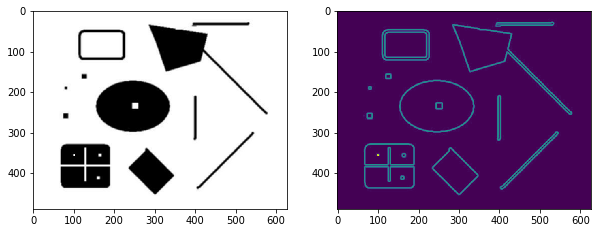

-1.5708 1.5708


In [7]:
im = plt.imread('images/edge.PNG')
gray_im = 0.299 * im[:, :, 1] + 0.587 * im[:, :, 2] + 0.114 * im[:, :, 3] 
dx, dy = np.gradient(gray_im)
print(im.shape, dx.shape, dy.shape)

gradient_mag = np.sqrt(np.square(dx) + np.square(dy))
plot_side_by_side(im, gradient_mag)
gradient_arg = np.arctan(dy / (dx + 1e-10))
print(gradient_arg.min(), gradient_arg.max())

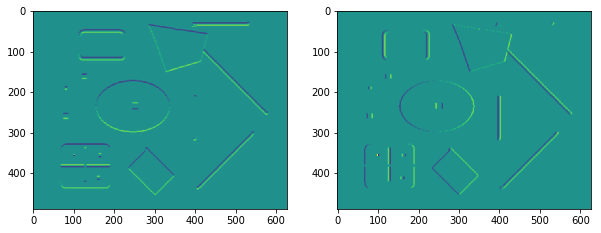

In [8]:
plot_side_by_side(dx, dy)

In [9]:
from src.harris import compute_harris_interest_points, patch_non_maxima_suppression

harris = compute_harris_interest_points(im, harris_alpha = 0.05, blur_sigma = 2) # compute raw harris interest points
img = patch_non_maxima_suppression(harris, patch_shape=(5, 5), return_coords=False)
x, y = np.where(img > img.mean())

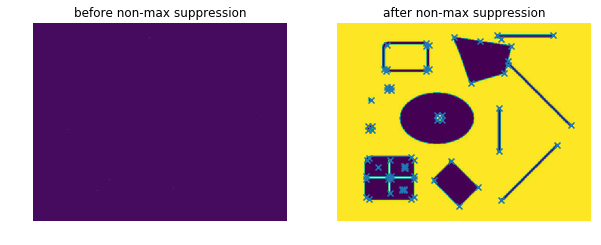

In [10]:
plt.figure(figsize=[10, 20])
plt.subplot(1, 2, 1)
plt.imshow(harris)
plt.axis('off')
plt.title('before non-max suppression')
plt.subplot(1, 2, 2)
plt.imshow(gray_im)
plt.scatter(y, x, marker='x')
plt.axis('off')
plt.title('after non-max suppression')
plt.show()

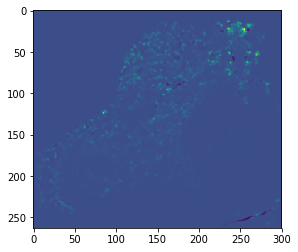

In [11]:
wild_cat = plt.imread('images/wild_cat.jpg')
gray_wild_cat = 0.299 * wild_cat[:, :, 0] + 0.587 * wild_cat[:, :, 1] + 0.114 * wild_cat[:, :, 2] 
wild_cat_harris = compute_harris_interest_points(gray_wild_cat, harris_alpha = 0.05, blur_sigma = 1)
plt.imshow(wild_cat_harris)

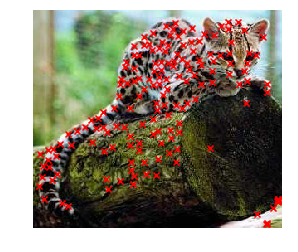

In [12]:
suppressed_wild_cat = patch_non_maxima_suppression(wild_cat_harris, patch_shape=(11, 11), return_coords = False)
x, y = np.where(suppressed_wild_cat > suppressed_wild_cat.mean() * 100)

plt.imshow(wild_cat)
plt.axis('off')
plt.scatter(y, x, marker='x', c='r')

In [13]:
std_boat_im = (boat_ims[0] - boat_ims[0].min()) / (boat_ims[0].max() - boat_ims[0].min())
print(std_boat_im.min(), std_boat_im.max())

0.0 1.0


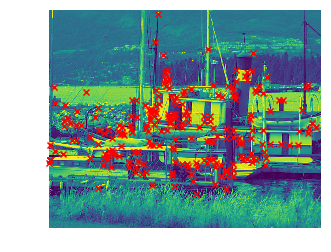

In [14]:
boat_harris = compute_harris_interest_points(std_boat_im, harris_alpha = 0.05, blur_sigma = 1)
suppressed_boat = patch_non_maxima_suppression(boat_harris, patch_shape=(11, 11), return_coords = False)
x, y = np.where(suppressed_boat > suppressed_boat.mean() * 700)
plt.imshow(std_boat_im)
plt.axis('off')
plt.scatter(y, x, marker='x', c='r')

In [15]:
from src.descriptors import get_patch_histograms_from_interest_points_vec
_, bins = np.histogram(np.arange(255), bins=10)
descriptors = get_patch_histograms_from_interest_points_vec(std_boat_im, interest_points=(y, x), bins=bins, patch_size=13)
print(descriptors.shape)

AttributeError: 'tuple' object has no attribute 'shape'